## Exploring the Zillow Data

In [1]:
import wrangle as wr

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get Data:
zillow = wr.get_zillow_data()
zillow.head(2)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0


In [3]:
# Function to clean the zillow data
zillow = wr.clean_zillow(zillow)
zillow.head(2)

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
4,4,2.0,3633,296425.0,2005,6941.39,6037
6,3,4.0,1620,847770.0,2011,10244.94,6037


In [4]:
# Function to remove the outliers of the zillow data so that they do not affect the regression models
col_list = ['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'tax_amount']
zillow = wr.remove_outliers(zillow, 1.5, col_list)
zillow.head(2)

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
4,4,2.0,3633,296425.0,2005,6941.39,6037
6,3,4.0,1620,847770.0,2011,10244.94,6037


In [5]:
# Split into train, validate, and test:
train_and_validate, test = train_test_split(zillow.drop(columns=['fips']), random_state=123)
train, validate = train_test_split(train_and_validate)

In [6]:
# Min max scaler:
train_scaled, val_scaled, test_scaled = wr.zillow_scaler(train, validate, test)

In [7]:
train_scaled.head(2)

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,bedrooms_scaled,bathrooms_scaled,sqft_scaled,tax_value_scaled,tax_amount_scaled
1787729,3,2.0,1161,273034.0,1959,3010.98,0.5,0.363636,0.205419,0.144300,0.143377
162473,3,3.0,2865,470157.0,1979,5252.44,0.5,0.545455,0.507172,0.248489,0.250586


### One function to do all of the Above:

In [8]:
train_scaled, val_scaled, test_scaled = wr.wrangle_zillow()
train_scaled.head(2)

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,bedrooms_scaled,bathrooms_scaled,sqft_scaled,tax_value_scaled,tax_amount_scaled
375750,3,2.0,1240,249700.0,1971,2591.56,0.5,0.363636,0.219409,0.131967,0.123610
1888440,3,1.0,1960,662807.0,1910,7857.70,0.5,0.181818,0.346910,0.350313,0.375406


## Explore:

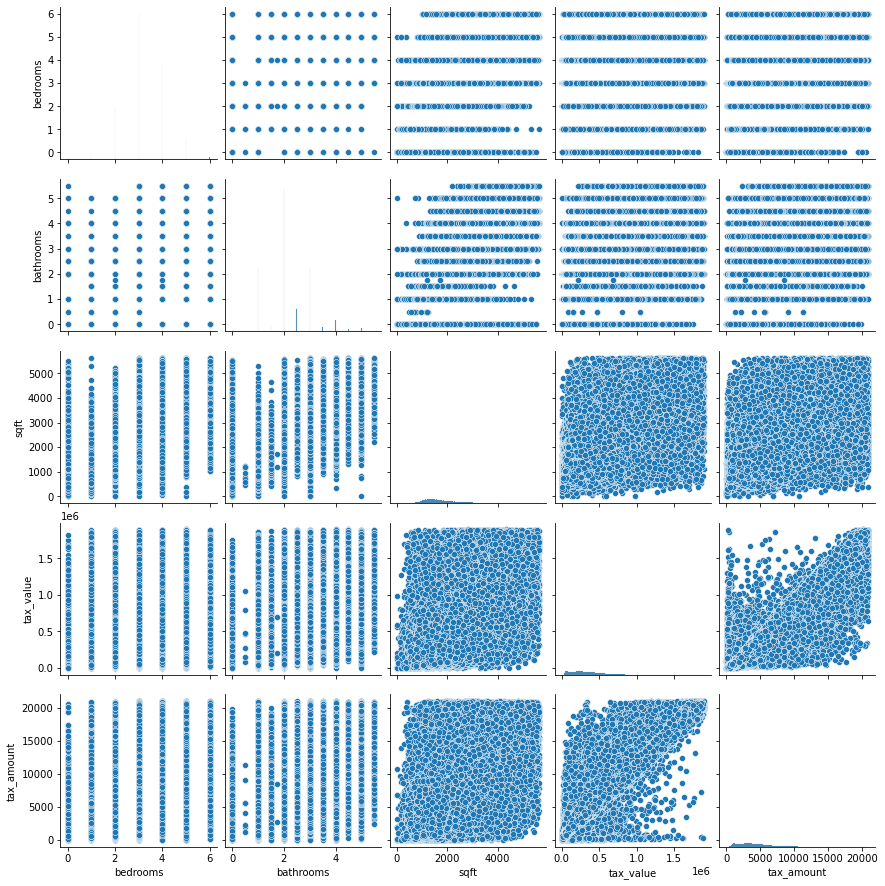

In [9]:
col_list = ['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'tax_amount']
sns.pairplot(train_scaled[col_list])
plt.show()